In [2]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression

In [137]:
# Создаём сэмпл (расход топлива при поездке)
n_samples = 500

avg_speed = np.random.choice(60, n_samples) + 50
number_stop = np.random.choice(50, n_samples)+1
distance = np.random.choice(800, n_samples) + 200
fuel_consumption = np.random.choice(7, n_samples) + 7

total_fuel = (distance*fuel_consumption/100)*(1+distance*0.01/number_stop)*0.01*avg_speed

data = pd.DataFrame({'avg_speed': avg_speed, 'number_stop': number_stop, 'distance': distance
                     ,'fuel_consumption': fuel_consumption, 'total_fuel': total_fuel})
data.head()

,avg_speed,number_stop,distance,fuel_consumption,total_fuel
0,62,50,987,11,80.601065
1,106,46,607,7,50.982643
2,82,32,368,9,30.281616
3,64,44,877,8,53.852265
4,102,23,884,8,99.859100


In [138]:
data.total_fuel.mean()

70.99632919203836

In [139]:
from sklearn.metrics import mean_absolute_error

X = data[['avg_speed', 'number_stop', 'distance', 'fuel_consumption']]
y = data['total_fuel']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X)
print('Error, %: {}'.format(mean_absolute_error(pred_values, y)*100/data.total_fuel.mean()))

Weights: [ 0.95914172 -1.5012198   0.14488573  7.08316059]
Bias: -123.57681529293713
Error, %: 26.972631573975598


In [140]:
# пробуем то же самое, но на нормализованных данных

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
np_scaled = min_max_scaler.fit_transform(data)
data_norm = pd.DataFrame(np_scaled)
data_norm.head()

,0,1,2,3,4
0,0.203390,1.000000,0.986198,0.666667,0.079773
1,0.949153,0.918367,0.509410,0.000000,0.045661
2,0.542373,0.632653,0.209536,0.333333,0.021820
3,0.237288,0.877551,0.848181,0.166667,0.048966
4,0.881356,0.448980,0.856964,0.166667,0.101953


In [141]:
# нормализация не помогла ровно никак, даже увеличив относительную ошибку

X = data_norm.iloc[:,:4]
y = data_norm.iloc[:,4:]
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X)
print('Error, %: {}'.format(mean_absolute_error(pred_values, y)*100/data_norm[4].mean()))

Weights: [[ 0.06517454 -0.08471954  0.1329925   0.04894649]]
Bias: [-0.01123247]
Error, %: 32.09771279041967


In [142]:
# попробуем убрать столбцы, которые не влияют на результат 
# (даже не зная формулы, можно предположить, что количество остановок не влияет)

X = data.drop(['total_fuel', 'number_stop'], axis = 1)
y = data['total_fuel']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X)
print('Error, %: {}'.format(mean_absolute_error(pred_values, y)*100/data.total_fuel.mean()))

#снова увеличили ошибку

Weights: [0.96622049 0.14200233 7.76846228]
Bias: -168.71491734910467
Error, %: 29.8088155257404


In [143]:
# Создаем новый признак
data['f_cons_pure'] = data['distance'] * data['fuel_consumption']/100
data.head(5)

,avg_speed,number_stop,distance,fuel_consumption,total_fuel,f_cons_pure
0,62,50,987,11,80.601065,108.57
1,106,46,607,7,50.982643,42.49
2,82,32,368,9,30.281616,33.12
3,64,44,877,8,53.852265,70.16
4,102,23,884,8,99.859100,70.72


In [144]:
X = data[['avg_speed', 'number_stop', 'distance', 'fuel_consumption', 'f_cons_pure']]
y = data['total_fuel']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X)
print('Error, %: {}'.format(mean_absolute_error(pred_values, y)*100/data.total_fuel.mean()))

#снова результат так себе

Weights: [ 0.97798505 -1.50321405  0.00272677 -1.39116667  1.42873716]
Bias: -40.76715031379278
Error, %: 26.38353042958248


In [145]:
# попробуем обучиться только на новом столбце

X = data[['f_cons_pure']]
y = data['total_fuel']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X)
print('Error, %: {}'.format(mean_absolute_error(pred_values, y)*100/data.total_fuel.mean()))

#снова результат так себе

Weights: [1.37340641]
Bias: -11.470380391969499
Error, %: 30.719750860364858


In [146]:
# добавим дистанцию

X = data[['f_cons_pure', 'number_stop', 'distance']]
y = data['total_fuel']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X)
print('Error, %: {}'.format(mean_absolute_error(pred_values, y)*100/data.total_fuel.mean()))

#снова результат так себе

Weights: [ 1.17520441 -1.50991715  0.02578578]
Bias: 24.63255123228234
Error, %: 31.9155377048291


In [147]:
# перемножим все признаки
data['mult'] = data['distance'] * data['fuel_consumption']*data['avg_speed'] * data['number_stop']
data.head(5)

,avg_speed,number_stop,distance,fuel_consumption,total_fuel,f_cons_pure,mult
0,62,50,987,11,80.601065,108.57,33656700
1,106,46,607,7,50.982643,42.49,20718124
2,82,32,368,9,30.281616,33.12,8690688
3,64,44,877,8,53.852265,70.16,19757056
4,102,23,884,8,99.859100,70.72,16590912


In [148]:
# снова строим модельку

X = data[['mult']]
y = data['total_fuel']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X)
print('Error, %: {}'.format(mean_absolute_error(pred_values, y)*100/data.total_fuel.mean()))

#снова результат так себе

Weights: [6.57518945e-07]
Bias: 62.78820306422364
Error, %: 49.42920460441576


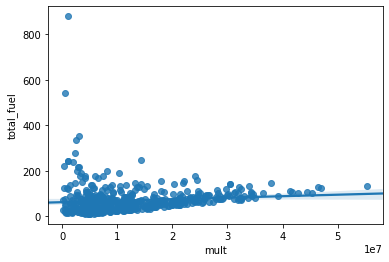

In [149]:
# построим визуализацию того, что казалось бы, должно работать
import seaborn as sns
sns.regplot(x=data['mult'], y=data['total_fuel'], data=data, fit_reg=True)
# видим выбросы

In [150]:
# убираем выбросы
datanew = data.loc[data['total_fuel'] < 200]

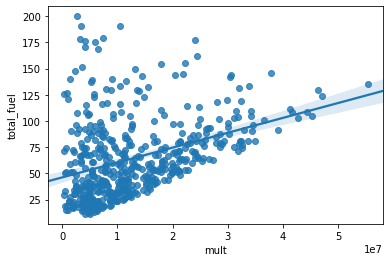

In [151]:
# построим визуализацию того, что осталось
import seaborn as sns
sns.regplot(x=datanew['mult'], y=datanew['total_fuel'], data=datanew, fit_reg=True)

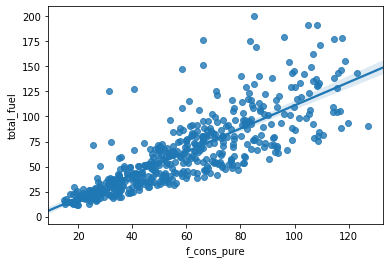

In [152]:
# попробуем с другим параметром
import seaborn as sns
sns.regplot(x=datanew['f_cons_pure'], y=datanew['total_fuel'], data=datanew, fit_reg=True)

In [153]:
# снова строим модельку

X = datanew[['f_cons_pure']]
y = datanew['total_fuel']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X)
print('Error, %: {}'.format(mean_absolute_error(pred_values, y)*100/datanew.total_fuel.mean()))

#результат заметно лучше

Weights: [1.15586958]
Bias: -4.498693569479968
Error, %: 23.828376628996796


In [154]:
# попробуем учесть среднюю скорость, как теоретически важный фактор

datanew['fcp_sp'] = datanew['f_cons_pure'] * datanew['avg_speed']
datanew.head(5)

# прошу преподавателя пояснить что это за ошибка (на данные вроде бы не влияет)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,avg_speed,number_stop,distance,fuel_consumption,total_fuel,f_cons_pure,mult,fcp_sp
0,62,50,987,11,80.601065,108.57,33656700,6731.34
1,106,46,607,7,50.982643,42.49,20718124,4503.94
2,82,32,368,9,30.281616,33.12,8690688,2715.84
3,64,44,877,8,53.852265,70.16,19757056,4490.24
4,102,23,884,8,99.859100,70.72,16590912,7213.44


In [156]:
# снова строим модельку

X = datanew[['f_cons_pure', 'fcp_sp']]
y = datanew['total_fuel']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X)
print('Error, %: {}'.format(mean_absolute_error(pred_values, y)*100/data.total_fuel.mean()))

#результат ещё лучше, и вполне приемлем для промышленного испоьзования (погрешность в расходе 15% вполне допустима)


Weights: [0.24586058 0.01204662]
Bias: -6.695153638094581
Error, %: 14.781421352221667
